In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# read dataset
data =pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

In [4]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
dataScaled = pd.DataFrame(dataScaled,columns=data.columns)

In [6]:
km = KMeans(n_clusters=3,random_state=10)
predictedClusters = km.fit(dataScaled)


In [7]:
predictedClusters.inertia_

2147.6785841630854

In [8]:
data["Pred_Clusters"]=predictedClusters
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Pred_Clusters
0,2,3,12669,9656,7561,214,2674,1338,"KMeans(n_clusters=3, random_state=10)"
1,2,3,7057,9810,9568,1762,3293,1776,"KMeans(n_clusters=3, random_state=10)"
2,2,3,6353,8808,7684,2405,3516,7844,"KMeans(n_clusters=3, random_state=10)"
3,1,3,13265,1196,4221,6404,507,1788,"KMeans(n_clusters=3, random_state=10)"
4,2,3,22615,5410,7198,3915,1777,5185,"KMeans(n_clusters=3, random_state=10)"
5,2,3,9413,8259,5126,666,1795,1451,"KMeans(n_clusters=3, random_state=10)"
6,2,3,12126,3199,6975,480,3140,545,"KMeans(n_clusters=3, random_state=10)"
7,2,3,7579,4956,9426,1669,3321,2566,"KMeans(n_clusters=3, random_state=10)"
8,1,3,5963,3648,6192,425,1716,750,"KMeans(n_clusters=3, random_state=10)"
9,2,3,6006,11093,18881,1159,7425,2098,"KMeans(n_clusters=3, random_state=10)"


In [9]:
data['Pred_Clusters'].value_counts()

KMeans(n_clusters=3, random_state=10)    440
Name: Pred_Clusters, dtype: int64

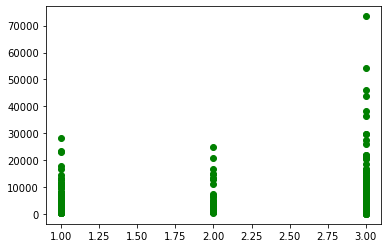

In [10]:
data1 = data[data.Pred_Clusters==0]
data2 = data[data.Pred_Clusters==1]
data3 = data[data.Pred_Clusters==2]

plt.scatter(data.Region,data.Milk,color='green')
plt.scatter(data1.Region,data1.Milk,color='red')

In [11]:
dataScaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [12]:
sse=[]

for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(dataScaled)
    sse.append(kmeans.inertia_)

In [13]:
sse

[3520.0,
 2599.38555935614,
 2149.283956221759,
 1846.9413961833907,
 1549.587996288439,
 1314.9781232436185,
 1173.954354186053,
 1050.2532627461544,
 978.152060219765,
 913.3417434235748,
 846.2490040211301,
 787.9141064158808,
 757.3612651589435,
 718.4139186686133,
 681.2472329598161,
 647.857468635095,
 624.236358965044,
 606.4030525460697,
 580.0453407698]

Text(0, 0.5, 'wcss')

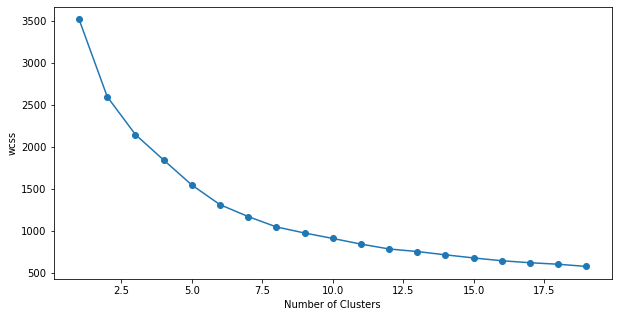

In [14]:
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':sse})
plt.figure(figsize =(10,5))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

In [15]:
frame

,Cluster,SSE
0,1,3520.000000
1,2,2599.385559
2,3,2149.283956
3,4,1846.941396
4,5,1549.587996
5,6,1314.978123
6,7,1173.954354
7,8,1050.253263
8,9,978.152060
9,10,913.341743
